In [5]:
import pandas as pd
import random
import string
import re
import matplotlib.pyplot as plt

In [3]:
# Load the data from the CSV file
df = pd.read_csv('careers.csv')
df.head()

,Category,Job Title,Job Description,Job URL,Average Salary,Typical Hours(a week),You could work,How to become,What it takes,What you’ll do,Career path and progression,Current opportunities
0,Administration,Accounting technician,Accounting technicians handle day-to-day money...,https://nationalcareers.service.gov.uk/job-pro...,"£17,000 Starter to £34,000 Experienced",37 to 39 a week,between 8am and 6pm,College Apprenticeship Work Direct Application...,Skills and knowledge You'll need: to be thorou...,Day-to-day tasks Working environment On a typi...,"With experience, you could: AAT and ACCA quali...",Apprenticeships In England Courses In England ...
1,Administration,Admin assistant,Admin assistants give support to businesses by...,https://nationalcareers.service.gov.uk/job-pro...,"£14,000 Starter to £28,000 Experienced",38 to 40 a week,between 8am and 6pm,College Apprenticeship Work Volunteering Direc...,Skills and knowledge You'll need: administrati...,Day-to-day tasks Working environment In this r...,"With experience, you could progress from admin...",Apprenticeships In England Courses In England ...
2,Administration,Arts administrator,"Arts administrators help organise exhibitions,...",https://nationalcareers.service.gov.uk/job-pro...,"£15,000 Starter to £30,000 Experienced",37 to 39 variable,evenings / weekends / bank holidays attending ...,University College Apprenticeship Volunteering...,Skills and knowledge You'll need: business man...,Day-to-day tasks Working environment You could...,"With experience, you could become an arts offi...",Apprenticeships In England Courses In England ...
3,Administration,Assistant immigration officer,Assistant immigration officers check that peop...,https://nationalcareers.service.gov.uk/job-pro...,"£18,533 Starter to £21,330 Experienced",41 to 43 a week,evenings / weekends / bank holidays on shifts,College Apprenticeship Direct Application More...,Skills and knowledge Restrictions and Requirem...,Day-to-day tasks Working environment In this r...,You could become an immigration officer or mov...,Apprenticeships In England Courses In England ...
4,Administration,Auditor,Internal and external auditors check organisat...,https://nationalcareers.service.gov.uk/job-pro...,"£19,000 Starter to £65,000 Experienced",37 to 39 a week,evenings away from home,University Apprenticeship Direct Application O...,Skills and knowledge You'll need: knowledge of...,Day-to-day tasks Working environment In your d...,"As an experienced external auditor, you could ...",Apprenticeships In England Courses In England ...


In [4]:
category_count = grouped = df.groupby('Category').count()

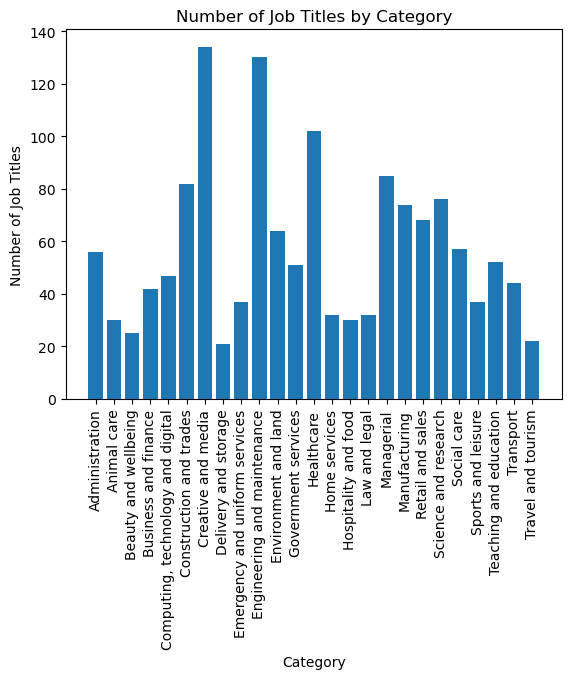

In [6]:
# Create a bar plot of the number of job titles under each category
fig, ax = plt.subplots()
ax.bar(category_count.index, grouped['Job Title'])
ax.set_xlabel('Category')
ax.set_ylabel('Number of Job Titles')
ax.set_title('Number of Job Titles by Category')
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [43]:
#Remove first and second column
df = df.drop(df.columns[[0,1]], axis=1)

In [44]:
# Concatenate all columns into a single string
text = ''
for col in df.columns:
    text += ' '.join(df[col].fillna('').tolist()) + ' '

In [45]:
# Split the text into sentences
sentences = text.split('. ')

In [46]:
#converting the careers dataset into a single column dataset and saving it to dataframe
df = pd.DataFrame({'text': sentences})

In [47]:
#pre process the text using this function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    return text

In [48]:
# Apply preprocessing to 'text' column
df['text'] = df['text'].apply(preprocess_text)

In [49]:
#save to csv
df.to_csv('careers_single.csv', index=False)

In [39]:
df.head()

,text
0,accounting technicians handle daytoday money a...
1,admin assistants give support to businesses by...
2,arts administrators help organise exhibitions ...
3,assistant immigration officers check that peop...
4,internal and external auditors check organisat...


In [51]:
# Get the preprocessed sentences
sentences = df['text'].tolist()

In [52]:
# Create a list to store the masked sentences
masked_sentences = []

In [53]:
# Loop over each sentence
for sentence in sentences:
    # Split the sentence into words
    words = sentence.split(' ')
    # Create a list to store the masked words
    masked_words = []
    # Loop over each word
    for i, word in enumerate(words):
        # Mask the word with a [MASK] token with a probability of 15%
        if i > 0 and i < len(words) - 1 and random.random() < 0.15:
            masked_words.append('[MASK]')
        else:
            masked_words.append(word)
    # Join the masked words back into a sentence
    masked_sentence = ' '.join(masked_words)
    # Append the masked sentence to the list of masked sentences
    masked_sentences.append(masked_sentence)

In [54]:
# Save the masked sentences to a new CSV file
df_masked = pd.DataFrame({'text': masked_sentences})
df_masked.to_csv('careers_masked.csv', index=False)

In [56]:
#Masking for bart
# Create a list to store the masked sentences
masked_bert = []
# Loop over each sentence
for sentence in sentences:
    # Split the sentence into words
    words = sentence.split(' ')
    # Create a list to store the masked words
    masked_words = []
    # Loop over each word
    for i, word in enumerate(words):
        # Mask the word with a [MASK] token with a probability of 15%
        if i > 0 and i < len(words) - 1 and random.random() < 0.15:
            masked_words.append('<mask>')
        else:
            masked_words.append(word)
    # Join the masked words back into a sentence
    masked_sentence = ' '.join(masked_words)
    # Append the masked sentence to the list of masked sentences
    masked_bert.append(masked_sentence)

In [58]:
# Save the masked sentences to a new CSV file
bert_masked = pd.DataFrame({'text': masked_bert})
bert_masked.to_csv('bart_masked.csv', index=False)

In [ ]:
for sentence in sentences:
    words = sentence.split(' ')
    masked_words = []
    for i, word in enumerate(words):
        if i > 0 and i < len(words) - 1 and random.random() < 0.15:
            masked_words.append('[MASK]')  # Use '<mask>' for BART
        else:
            masked_words.append(word)
    masked_sentence = ' '.join(masked_words)
    masked_sentences.append(masked_sentence)